# EXPLORE Data Science Academy Classification Hackathon
Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

# **Table of Contents**
1. Data Collection 
2. Data Cleaning 
3. Exploratory data Analysis
4. Model Building
5. Model Deployment

# Data collection 
The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

In [1]:
#pandas and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# tweet cleaning and transformation
import nltk
import re
import string
#import preprocessor as p
import string
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 

# training the model
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Asssessing the model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
#resampling module
from sklearn.utils import resample
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# Loading the data




In [2]:

df = pd.read_csv('sample_submission.csv')
df1_test = pd.read_csv('test_set.csv')
df2_train = pd.read_csv('train_set.csv')


# Data cleaning and transformtion 

In [3]:
df2_train.tail()

,lang_id,text
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...


In [4]:
df2_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
df1_test.isnull().sum() # checking for null values on our test dataset

index    0
text     0
dtype: int64

In [6]:
df2_train.shape

(33000, 2)

In [7]:
df2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [8]:
type_lang_id = list(df2_train.lang_id.unique())
print(type_lang_id)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


In [9]:
# Longest and shortest text

length_text = df2_train.text.str.len()

# How long is the longest text?
print("Longest text:", max(length_text))

# How long is the shortest text?
print("Shortest text:",min(length_text))

Longest text: 299
Shortest text: 201


# Cleaning the Data to do more Exploratory Data Analysis:



# Removing noise

In [10]:
df2_train

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [11]:
def removing_URL(data):
    return re.sub(r"http\s","",data)
def removing_repeating_char(data):
    return re.sub(r'(.)1_',r'1',data)
def removing_numbers(data):
    return re.sub('[0-9]+','',data)

    
    
    data = re.sub('\[.*?\]','',data)
    data = re.sub('<.*?>+','',data)
    data = re.sub('[%s]'% re.escape(string.punctuation),'',data)
    data = re.sub('\w*\d\w*','',data)
    return data
def  clean_data(tokenized_text):
    "clean each word from list of tokenized text"
    tokenized_text = removing_URL( tokenized_text)
    tokenized_text = removing_repeating_char( tokenized_text)
    tokenized_text = removing_numbers( tokenized_text)
    
    return tokenized_text

In [12]:
df2_train['text'] = df2_train['text'].apply(lambda x:clean_data(x))
df1_test['text'] = df1_test['text'].apply(lambda x:clean_data(x))

In [13]:
# make all lower case
df2_train['text'] = df2_train['text'].str.lower()

In [14]:
#remove puntuation
df2_train['text'] = df2_train['text'].apply(lambda x: ''.join([l for l in x if l not in string.punctuation]))
df2_train

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [15]:
#start by tokenizing the tweets
tokeniser = TreebankWordTokenizer()
df2_train['tokenized'] = df2_train['text'].apply(tokeniser.tokenize)


In [16]:
df2_train.head()

,lang_id,text,tokenized
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


# Exploratory Data Analysis

In [17]:
# Numeric Stats
df2_train.describe()

,lang_id,text,tokenized
count,33000,33000,33000
unique,11,29937,29931
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...,"[ngokwesekhtjheni, yomthetho, ophathelene, nal..."
freq,3000,17,17


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'xho'),
  Text(1, 0, 'eng'),
  Text(2, 0, 'nso'),
  Text(3, 0, 'ven'),
  Text(4, 0, 'tsn'),
  Text(5, 0, 'nbl'),
  Text(6, 0, 'zul'),
  Text(7, 0, 'ssw'),
  Text(8, 0, 'tso'),
  Text(9, 0, 'sot'),
  Text(10, 0, 'afr')])

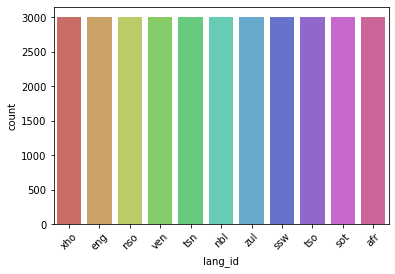

In [21]:
sns.countplot(x = 'lang_id', data = df2_train, palette="hls")
plt.xticks(rotation=45)

# Modeling

In [34]:
#Splitting features and target variables
X = df2_train['text']#X is the features of the cleaned tweets
y = df2_train['lang_id'] #Y is the target variable which is the train sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 6)

In [35]:
tfidf = TfidfVectorizer() #Call the TFidfVectorizer
cf= CountVectorizer() #Call the CountVectorizer

# RandomForestClassifier

In [36]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100)
clf_rf = Pipeline([('tfidf', tfidf), ('clf', rf)])
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred_rf, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred_rf,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred_rf)) #Print out the classification

accuracy 0.8909090909090909
f1_score 0.8919447614598448
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       307
         eng       0.97      1.00      0.99       308
         nbl       0.96      0.52      0.68       301
         nso       0.99      0.93      0.96       302
         sot       0.99      0.97      0.98       316
         ssw       0.53      0.88      0.66       288
         tsn       0.91      0.97      0.94       298
         tso       0.99      1.00      0.99       298
         ven       0.99      1.00      0.99       294
         xho       0.88      0.81      0.84       295
         zul       0.82      0.71      0.76       293

    accuracy                           0.89      3300
   macro avg       0.91      0.89      0.89      3300
weighted avg       0.91      0.89      0.89      3300



In [37]:
nb = MultinomialNB()
clf_nb= Pipeline([('tfidf', tfidf), ('clf', nb)])
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred_nb, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred_nb,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred_nb)) #Print out the classification

accuracy 0.9987878787878788
f1_score 0.9987873640909666
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       307
         eng       1.00      1.00      1.00       308
         nbl       1.00      0.99      1.00       301
         nso       1.00      1.00      1.00       302
         sot       1.00      1.00      1.00       316
         ssw       1.00      1.00      1.00       288
         tsn       1.00      1.00      1.00       298
         tso       1.00      1.00      1.00       298
         ven       1.00      1.00      1.00       294
         xho       1.00      1.00      1.00       295
         zul       1.00      1.00      1.00       293

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [38]:
nb = MultinomialNB()
clf_nb= Pipeline([('tfidf', tfidf), ('clf', nb)])
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred_nb, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred_nb,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred_nb)) #Print out the classification

accuracy 0.9987878787878788
f1_score 0.9987873640909666
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       307
         eng       1.00      1.00      1.00       308
         nbl       1.00      0.99      1.00       301
         nso       1.00      1.00      1.00       302
         sot       1.00      1.00      1.00       316
         ssw       1.00      1.00      1.00       288
         tsn       1.00      1.00      1.00       298
         tso       1.00      1.00      1.00       298
         ven       1.00      1.00      1.00       294
         xho       1.00      1.00      1.00       295
         zul       1.00      1.00      1.00       293

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



### Model Parameter Tuning

In [42]:
#MultinomialNB Hyperparameter tuning
tfid = TfidfVectorizer()
text = tfid.fit_transform(df2_train['text'])
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(text,y, test_size = 0.1, random_state = 6)
params = {'alpha':[1,0.1,0.01,5,10]}

grid_MNB = GridSearchCV(MultinomialNB(), params)
grid_MNB.fit(X_train_h, y_train_h)
print(grid_MNB.best_params_)

{'alpha': 0.1}


In [45]:
multi = Pipeline([('tfid', TfidfVectorizer()),
             ('clf', MultinomialNB(alpha = 0.1))])
multi.fit(X_train, y_train)
t = df1_test['text']
y_pred_m = multi.predict(t)
sub = pd.DataFrame( data = {'index': df1_test['index'],
                             'lang_id': y_pred_m })
sub.to_csv('submission_m.csv', index = False)
print('accuracy %s' % accuracy_score(y_pred_nb, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred_nb,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred_nb)) #Print out the classification

accuracy 0.9987878787878788
f1_score 0.9987873640909666
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       307
         eng       1.00      1.00      1.00       308
         nbl       1.00      0.99      1.00       301
         nso       1.00      1.00      1.00       302
         sot       1.00      1.00      1.00       316
         ssw       1.00      1.00      1.00       288
         tsn       1.00      1.00      1.00       298
         tso       1.00      1.00      1.00       298
         ven       1.00      1.00      1.00       294
         xho       1.00      1.00      1.00       295
         zul       1.00      1.00      1.00       293

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [46]:
# Make Submission
Submission = pd.DataFrame(df1_test['index'])
Submission['lang_id'] = multi.predict(df1_test['text'])
Submission.to_csv('Bethuel_Masango',index=False)